In [22]:
!pip install pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [7]:
# Get the size of the MNIST datasets
train_size = len(train_images)
test_size = len(test_images)

print("Training dataset size:", train_size)
print("Testing dataset size:", test_size)


Training dataset size: 60000
Testing dataset size: 10000


In [8]:
train_image_shape = train_images.data.shape[1:]
test_image_shape = test_images.data.shape[1:]

print("Shape of images in training dataset:", train_image_shape)
print("Shape of images in testing dataset:", test_image_shape)

Shape of images in training dataset: (28, 28)
Shape of images in testing dataset: (28, 28)


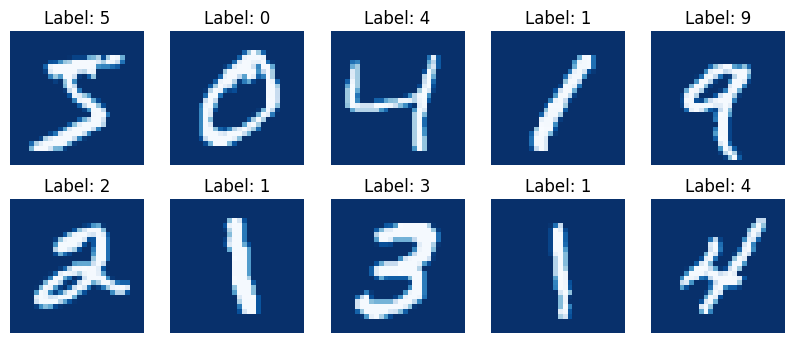

In [9]:
def show_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='Blues_r')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Sử dụng hàm show_images để hiển thị 10 hình ảnh từ tập dữ liệu huấn luyện
show_images(train_images, train_labels)

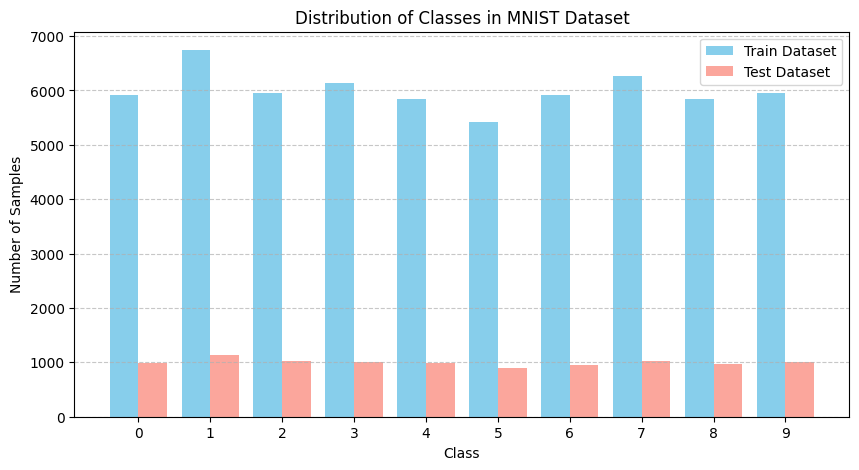

In [10]:
def plot_class_distribution(train_dataset, test_dataset, title):
    class_counts_train = [0] * 10
    for _, label in train_dataset:
        class_counts_train[label] += 1

    class_counts_test = [0] * 10
    for _, label in test_dataset:
        class_counts_test[label] += 1

    plt.figure(figsize=(10, 5))
    plt.bar(np.arange(10) - 0.2, class_counts_train, width=0.4, color='skyblue', label='Train Dataset')
    plt.bar(np.arange(10) + 0.2, class_counts_test, width=0.4, color='salmon', label='Test Dataset', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(range(10))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_class_distribution(zip(train_images, train_labels), zip(test_images, test_labels), 'Distribution of Classes in MNIST Dataset')


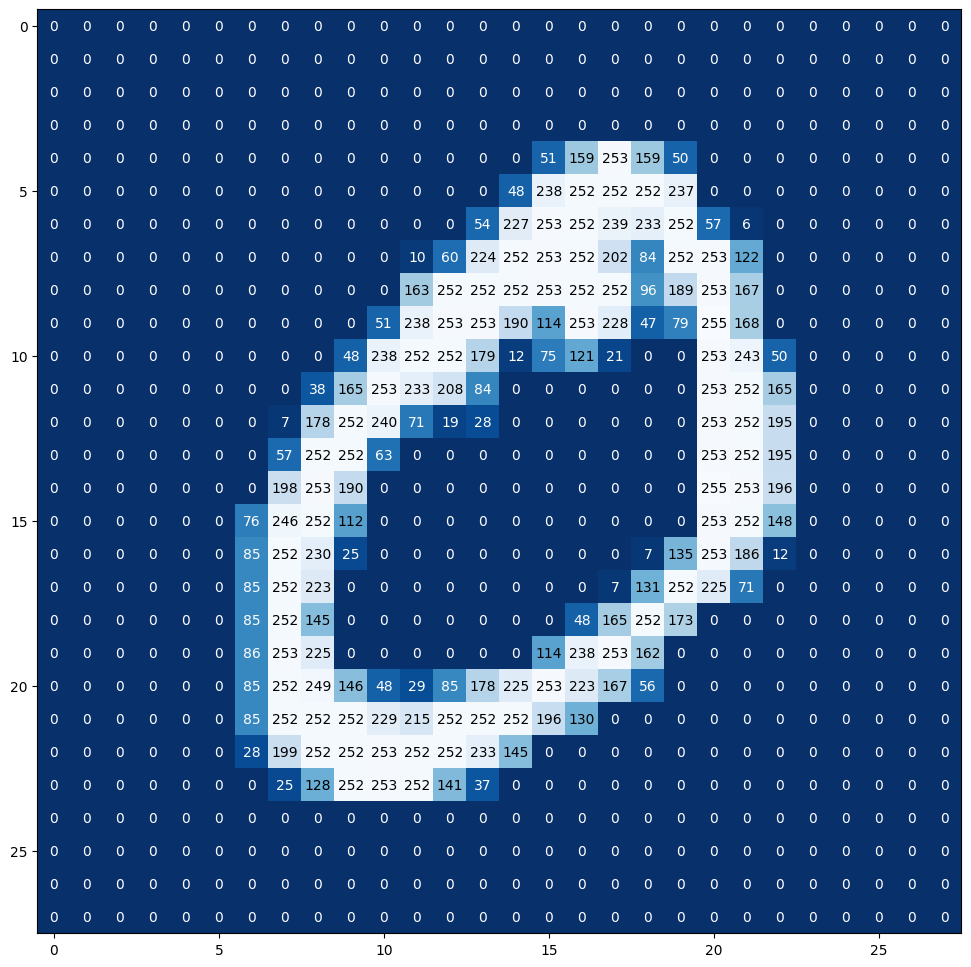

In [11]:

# Function to visualize an image from the dataset
def visualize_image(dataset, index):
    image_data, label = dataset[index]
    img = image_data.reshape((28, 28))

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='Blues_r')

    thresh = img.max() / 2.5
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            val = round(img[x][y], 2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')

    plt.show()


visualize_image(list(zip(train_images, train_labels)), 1)

In [12]:

# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the model architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(150, activation='relu'),
    layers.Dense(150, activation='tanh'),
    layers.Dense(150, activation='elu'),
    layers.Dense(10)
])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,560 (642.81 KB)

 Trainable params: 164,560 (642.81 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
model.compile(optimizer=optimizers.SGD(learning_rate=0.0003),
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=100, validation_data=(test_images, test_labels))
# prompt: lưu lại models

model.save('my_model.h5')


Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7919 - loss: 0.9884 - val_accuracy: 0.8085 - val_loss: 0.9153
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8062 - loss: 0.9176 - val_accuracy: 0.8179 - val_loss: 0.8557
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8129 - loss: 0.8613 - val_accuracy: 0.8264 - val_loss: 0.8044
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8191 - loss: 0.8176 - val_accuracy: 0.8351 - val_loss: 0.7600
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8272 - loss: 0.7690 - val_accuracy: 0.8411 - val_loss: 0.7215
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8317 - loss: 0.7339 - val_accuracy: 0.8460 - val_loss: 0.6878
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8398 - loss: 0.6972 - val_accuracy: 0.8514 - val_loss: 0.6582
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8410 - loss: 0.6749 - val_accuracy: 0.

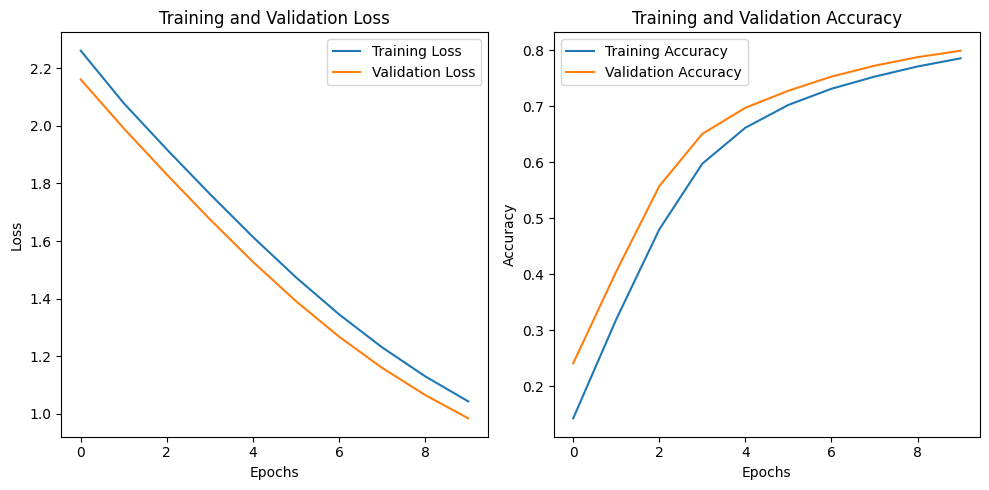

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


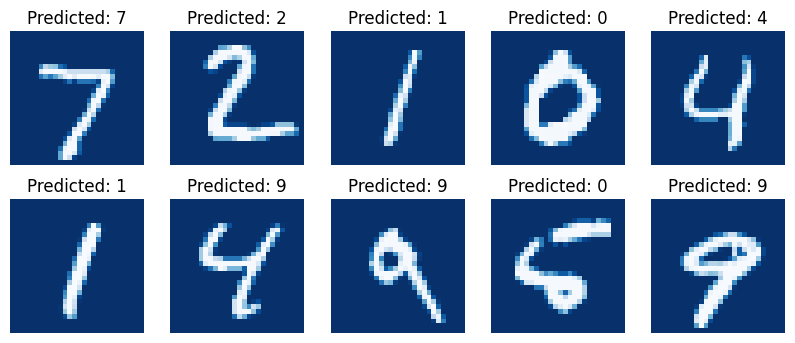

In [15]:

# Plot training loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions and display some images from the test dataset
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='Blues_r')
    plt.title('Predicted: {}'.format(predicted_labels[i].numpy()))
    plt.axis('off')
plt.show()

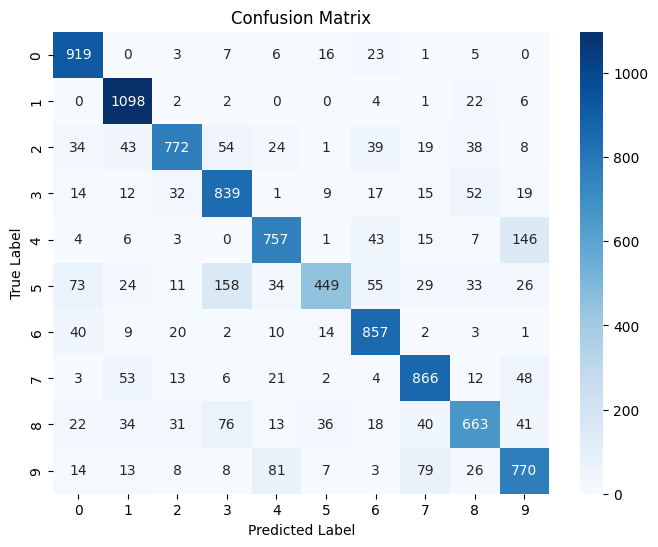

In [16]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels.numpy())

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


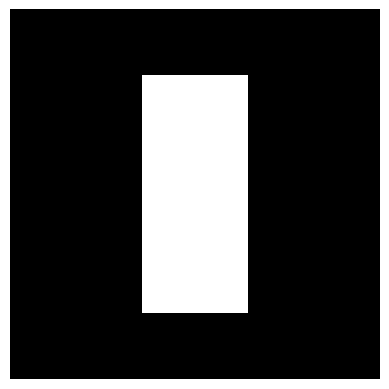

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label: 1


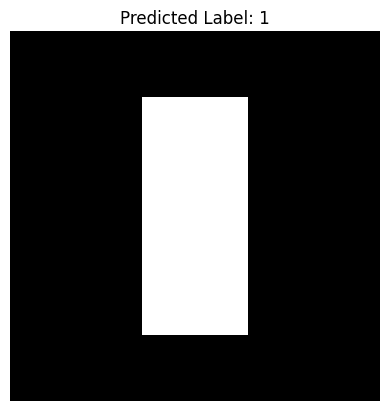

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ số bằng tay (ví dụ: số 7)
handwritten_number = np.zeros((28, 28))  # Tạo một mảng 2D 28x28 pixels
handwritten_number[5:23, 10:18] = 1       # Vẽ số 7 trong phạm vi cụ thể

# Hiển thị số bằng tay
plt.imshow(handwritten_number, cmap='gray')
plt.axis('off')
plt.show()

# Chuyển đổi hình ảnh số thành định dạng phù hợp
handwritten_number = handwritten_number.reshape((1, 28, 28))  # Thêm chiều batch_size

# Chuẩn hóa giá trị pixel
handwritten_number = handwritten_number / 255.0

# Sử dụng mô hình để dự đoán số đã viết
prediction = model.predict(handwritten_number)
predicted_label = np.argmax(prediction)

# Hiển thị số đã viết cùng với nhãn dự đoán
print("Predicted Label:", predicted_label)
plt.imshow(handwritten_number[0], cmap='gray')
plt.axis('off')
plt.title('Predicted Label: {}'.format(predicted_label))
plt.show()
